<a href="https://colab.research.google.com/github/AbdulazeezAde/AbdulazeezAde/blob/main/DSN_X_Microsoft_2024_AI_Bootcamp_Qualification_Hackathon_Health_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
%matplotlib inline

In [2]:
#upload files from local disk
from google.colab import files
uploaded = files.upload()

Saving train_data_edited.xlsx to train_data_edited.xlsx
Saving test_data_edited.xlsx to test_data_edited.xlsx


In [67]:
# Save and store Dataset in a Pandas Dataframe
import io
train_data = pd.read_excel(io.BytesIO(uploaded['train_data_edited.xlsx']))
test_data = pd.read_excel(io.BytesIO(uploaded['test_data_edited.xlsx']))
train_data.head()

Id  Age  Sex  chest_pain  restbps  cholestrol  FBS  restECG  \
0  16167   33    0           1      158         205    1        0   
1  11275   53    1           2      198         154    0        1   
2  13251   37    1           2      101         202    1        0   
3  19921   75    0           0      113         306    1        2   
4  11293   35    1           2      139         419    1        1   

   max_heart_rate  ex_anigma  oldpeak  slope  bvc_fluoroscopy  thal  target  
0             154          0      1.5      1                4     1       1  
1             104          0      0.8      2                1     0       0  
2             155          0      2.1      1                3     1       1  
3              88          1      4.9      0                2     2       1  
4             166          1      0.9      2                4     0       1

In [68]:
# Descriptive statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

                 Id          Age          Sex   chest_pain      restbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

        cholestrol          FBS      restECG  max_heart_rate    ex_anigma  \
count  7303.000000  7303.000000  7303.000000     7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008      136.506093     0.503218   
std     127.291998     0.499986     0.815806       38.141966     0.500024   
min     126.0000

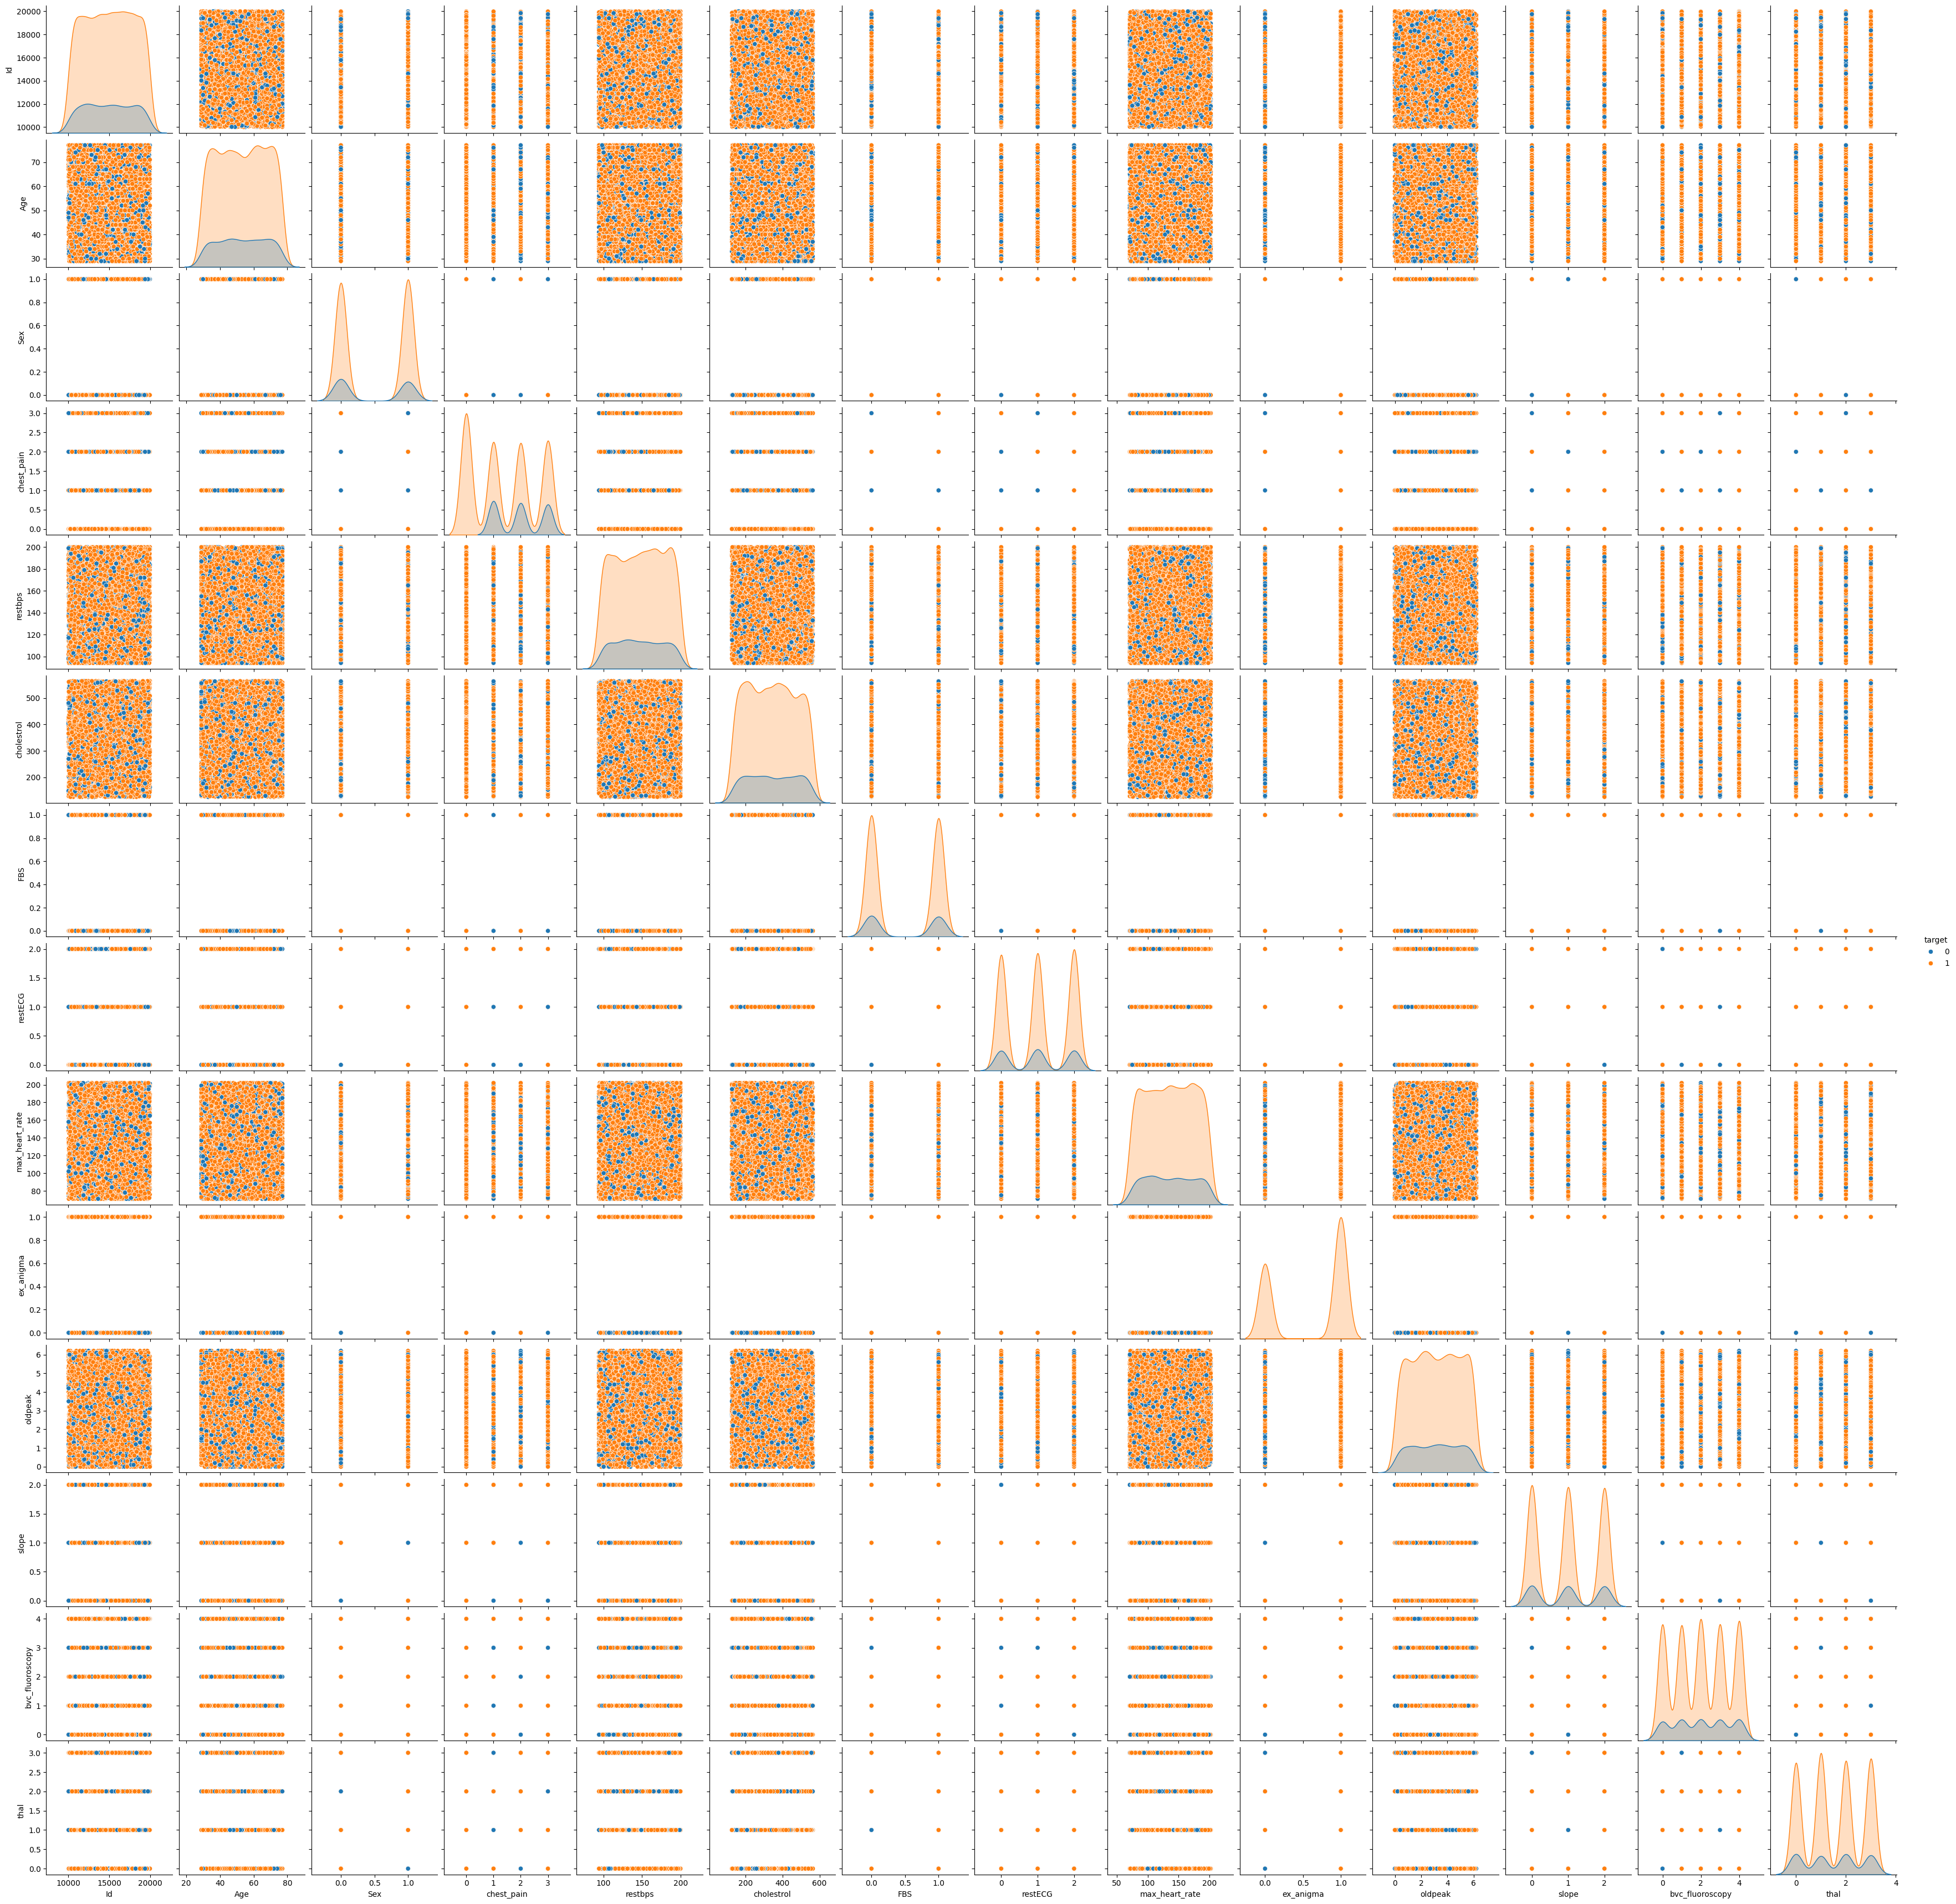

In [69]:

# Pairplot to visualize relationships between variables
sns.pairplot(train_data, hue='target')
plt.show()

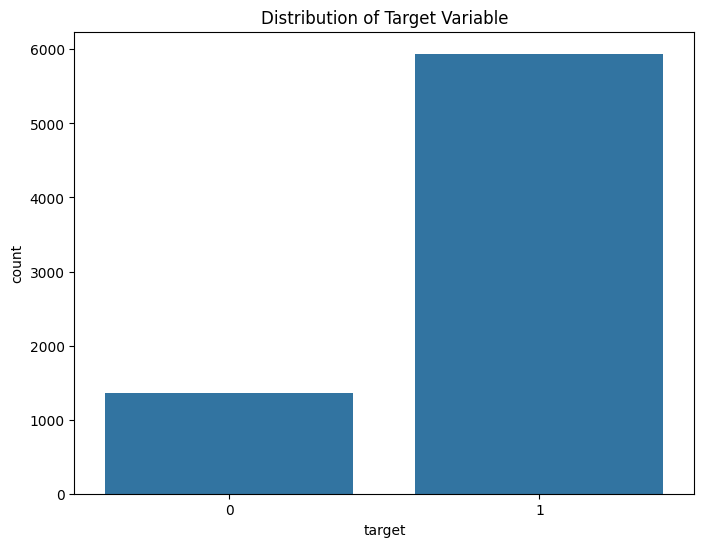

In [70]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()

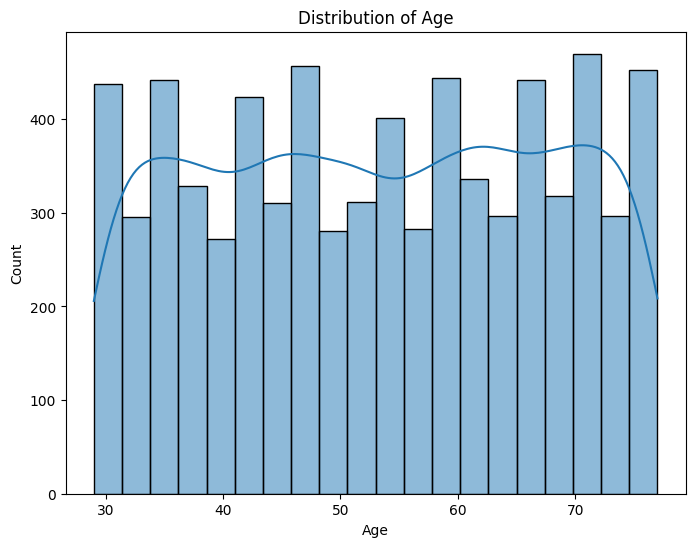

In [71]:
# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

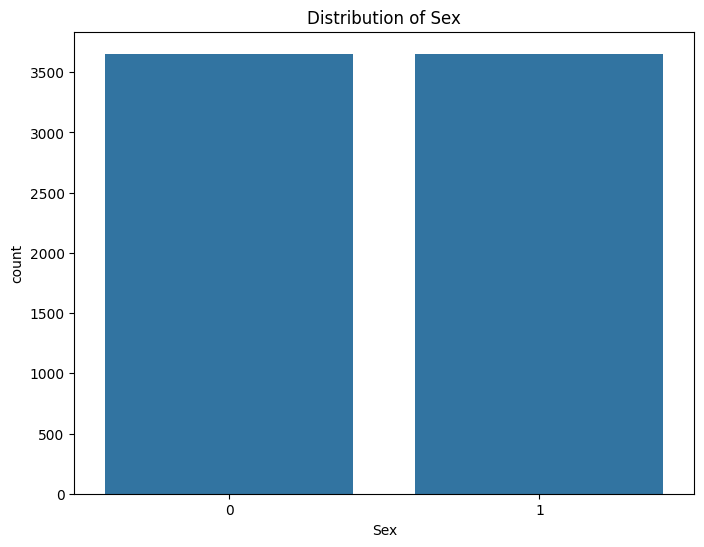

In [72]:
# Distribution of sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Sex')
plt.show()

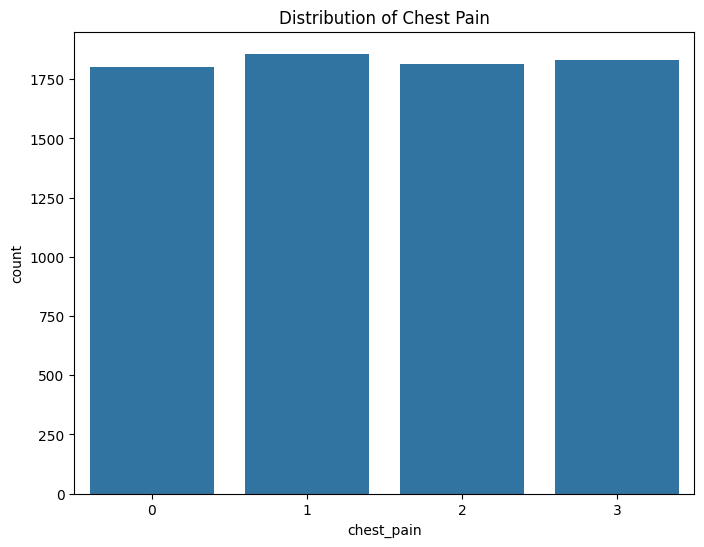

In [73]:
# Distribution of chest pain
plt.figure(figsize=(8, 6))
sns.countplot(x='chest_pain', data=train_data)
plt.title('Distribution of Chest Pain')
plt.show()

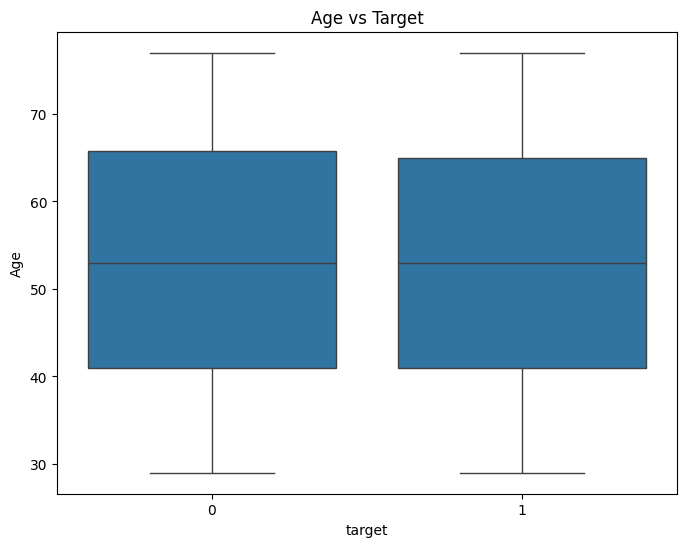

In [74]:
# Box plot of age vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='Age', data=train_data)
plt.title('Age vs Target')
plt.show()

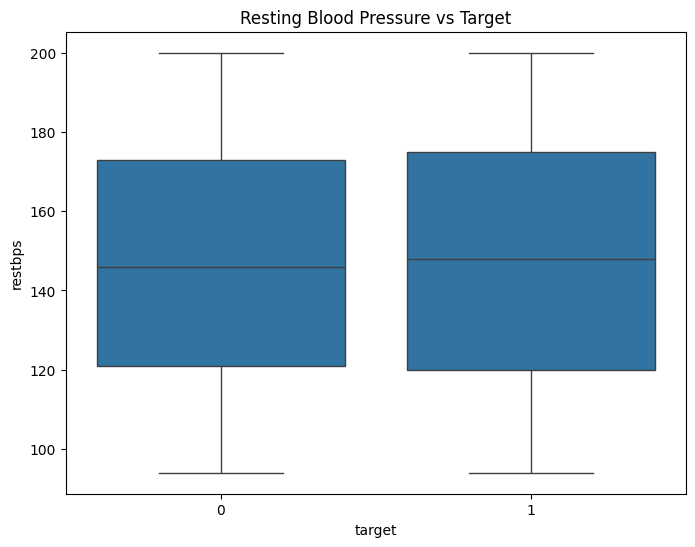

In [75]:
# Box plot of restbps vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='restbps', data=train_data)
plt.title('Resting Blood Pressure vs Target')
plt.show()

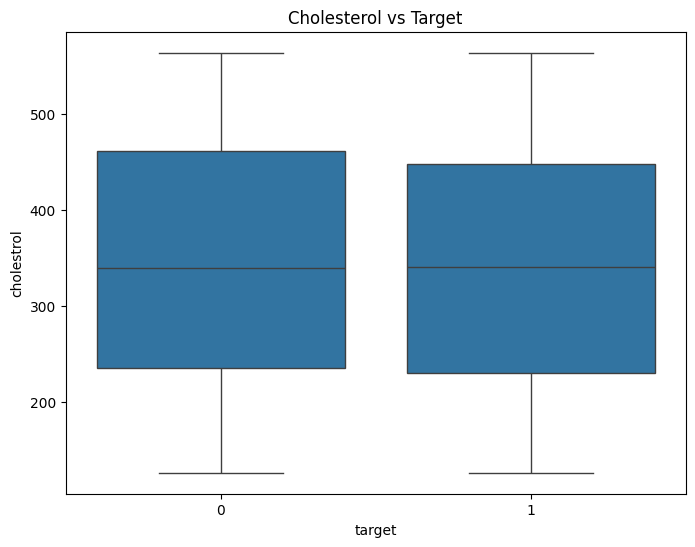

In [76]:
# Box plot of cholestrol vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='cholestrol', data=train_data)
plt.title('Cholesterol vs Target')
plt.show()

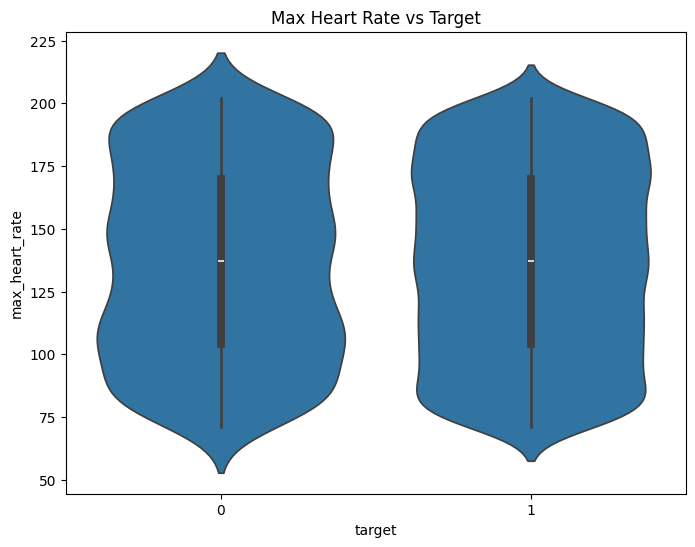

In [77]:

# Violin plot of max_heart_rate vs target
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='max_heart_rate', data=train_data)
plt.title('Max Heart Rate vs Target')
plt.show()

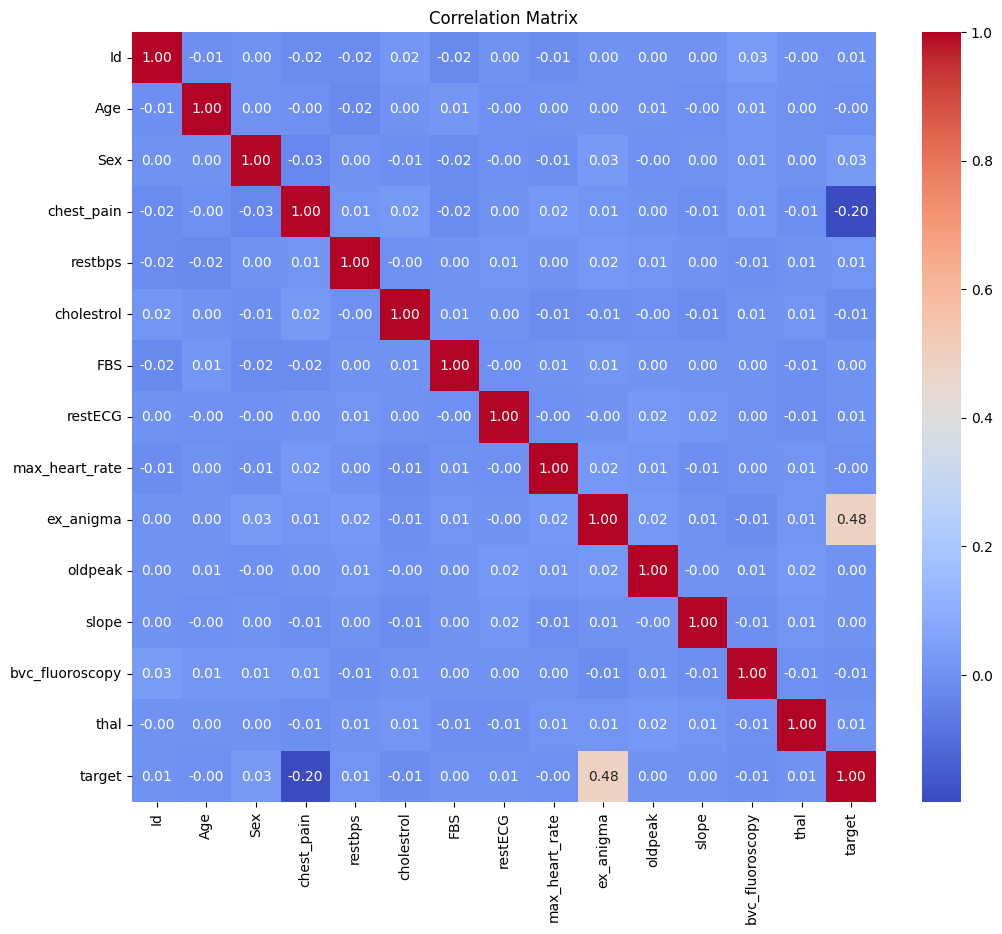

In [78]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [79]:
# Check for duplicate rows in the training data
duplicate_rows_train = train_data[train_data.duplicated()]

# Check for duplicate rows in the test data
duplicate_rows_test = test_data[test_data.duplicated()]

# Print the number of duplicate rows in each dataset
print("Number of duplicate rows in training data:", len(duplicate_rows_train))
print("Number of duplicate rows in test data:", len(duplicate_rows_test))

Number of duplicate rows in training data: 0
Number of duplicate rows in test data: 0


In [80]:
# one hot encodes the categorical variables.

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', drop = 'first')

# Select the columns to encode
cols_to_encode = ['restECG', 'chest_pain', 'slope', 'bvc_fluoroscopy', 'thal']
# Fit the encoder on the training data and transform both train and test data
encoded_features_train = enc.fit_transform(train_data[cols_to_encode]).toarray()
encoded_features_test = enc.transform(test_data[cols_to_encode]).toarray()

# Create new column names for the encoded features
feature_names = enc.get_feature_names_out(cols_to_encode)

# Convert the encoded features to DataFrames
encoded_df_train = pd.DataFrame(encoded_features_train, columns=feature_names)
encoded_df_test = pd.DataFrame(encoded_features_test, columns=feature_names)

# Concatenate the encoded features with the original DataFrames
train_data_encoded = pd.concat([train_data, encoded_df_train], axis=1)
test_data_encoded = pd.concat([test_data, encoded_df_test], axis=1)

# Drop the original categorical columns
train_data_encoded = train_data_encoded.drop(cols_to_encode, axis=1)
test_data_encoded = test_data_encoded.drop(cols_to_encode, axis=1)

# Align the columns of the train and test sets to ensure they have the same features
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='outer', axis=1, fill_value=0)

In [81]:
train_data_encoded.head()

Id  Age  Sex  restbps  cholestrol  FBS  max_heart_rate  ex_anigma  \
0  16167   33    0      158         205    1             154          0   
1  11275   53    1      198         154    0             104          0   
2  13251   37    1      101         202    1             155          0   
3  19921   75    0      113         306    1              88          1   
4  11293   35    1      139         419    1             166          1   

   oldpeak  target  ...  chest_pain_3  slope_1  slope_2  bvc_fluoroscopy_1  \
0      1.5       1  ...           0.0      1.0      0.0                0.0   
1      0.8       0  ...           0.0      0.0      1.0                1.0   
2      2.1       1  ...           0.0      1.0      0.0                0.0   
3      4.9       1  ...           0.0      0.0      0.0                0.0   
4      0.9       1  ...           0.0      0.0      1.0                0.0   

   bvc_fluoroscopy_2  bvc_fluoroscopy_3  bvc_fluoroscopy_4  thal_1  thal_2  \
0                0.0                0.0                1.0     1.0     0.0   
1                0.0                0.0                0.0     0.0     0.0   
2                0.0                1.0                0.0     1.0     0.0   
3                1.0                0.0                0.0     0.0     1.0   
4                0.0                0.0                1.0     0.0     0.0   

   thal_3  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 24 columns]

In [82]:
#feature engineering to create a new feature for better model understanding
train_data_encoded['age_sex_interaction'] = train_data_encoded['Age'] * train_data_encoded['Sex']
test_data_encoded['age_sex_interaction'] = test_data_encoded['Age'] * test_data_encoded['Sex']

In [83]:
# Divide dataset into features and target
X = train_data_encoded.drop('target', axis=1)
y = train_data_encoded['target']

In [84]:
from sklearn.model_selection import StratifiedKFold
# Split dataset into 5 folds cross validation
# StratifiedKFold for imbalanced datasets
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [85]:
# Load the test data without the target column
test = test_data_encoded.drop('target', axis=1)

In [86]:
# Create a StandardScaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select the columns to scale (typically numerical features)
cols_to_scale = ['Age', 'restbps', 'cholestrol', 'max_heart_rate', 'oldpeak', 'age_sex_interaction']

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])
test_scaled = scaler.transform(test[cols_to_scale])

# Replace the original columns in your training and test sets with the scaled versions
X_train[cols_to_scale] = X_train_scaled
X_test[cols_to_scale] = X_test_scaled
test[cols_to_scale] = test_scaled

<ipython-input-86-4f93014d6b3c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = X_train_scaled
<ipython-input-86-4f93014d6b3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols_to_scale] = X_test_scaled


In [87]:
test.head()

Id       Age  Sex   restbps  cholestrol  FBS  max_heart_rate  ex_anigma  \
0  16501  1.176982    1  0.501924    1.201790    0        0.877877          1   
1  10444  0.546768    1 -0.527018   -0.817863    0       -1.636912          1   
2  14288 -0.013422    1 -1.684578    1.696881    1       -1.663108          1   
3  10409 -1.133803    0  0.984241   -0.432793    0        1.454183          1   
4  17330 -1.273850    0 -1.395188   -0.479945    0       -0.379517          0   

    oldpeak  restECG_1  ...  slope_1  slope_2  bvc_fluoroscopy_1  \
0 -0.633376        0.0  ...      1.0      0.0                0.0   
1  0.988783        0.0  ...      0.0      1.0                0.0   
2 -1.360551        1.0  ...      1.0      0.0                1.0   
3  1.436276        1.0  ...      1.0      0.0                0.0   
4 -1.024932        0.0  ...      1.0      0.0                0.0   

   bvc_fluoroscopy_2  bvc_fluoroscopy_3  bvc_fluoroscopy_4  thal_1  thal_2  \
0                0.0                0.0                0.0     1.0     0.0   
1                1.0                0.0                0.0     0.0     1.0   
2                0.0                0.0                0.0     0.0     0.0   
3                0.0                0.0                0.0     0.0     0.0   
4                0.0                0.0                1.0     0.0     0.0   

   thal_3  age_sex_interaction  
0     0.0                   70  
1     0.0                   61  
2     0.0                   53  
3     0.0                    0  
4     1.0                    0  

[5 rows x 24 columns]

In [88]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


cat_model = CatBoostClassifier()
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

cat_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)


# Evaluate the models on the test set
cat_score = cat_model.score(X_test, y_test)
xgb_score = xgb_model.score(X_test, y_test)
lgb_score = lgb_model.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)
ada_score = ada_model.score(X_test, y_test)


print(f'CatBoost Test Accuracy: {cat_score:.4f}')
print(f'XGBoost Test Accuracy: {xgb_score:.4f}')
print(f'LightGBM Test Accuracy: {lgb_score:.4f}')
print(f'Random Forest Test Accuracy: {rf_score:.4f}')
print(f'AdaBoost Test Accuracy: {ada_score:.4f}')
# 2. Get predictions from each model
cat_p = cat_model.predict_proba(test)[:, 1]
xgb_p = xgb_model.predict_proba(test)[:, 1]
lgb_p = lgb_model.predict_proba(test)[:, 1]
rf_p = rf_model.predict_proba(test)[:, 1]
ada_p = ada_model.predict_proba(test)[:, 1]

Learning rate set to 0.021892
0:	learn: 0.6519665	total: 9.14ms	remaining: 9.13s
1:	learn: 0.6203640	total: 23ms	remaining: 11.5s
2:	learn: 0.5921990	total: 34ms	remaining: 11.3s
3:	learn: 0.5661553	total: 42.4ms	remaining: 10.6s
4:	learn: 0.5412114	total: 51.7ms	remaining: 10.3s
5:	learn: 0.5194607	total: 57.4ms	remaining: 9.51s
6:	learn: 0.5002966	total: 66.3ms	remaining: 9.4s
7:	learn: 0.4777638	total: 72.4ms	remaining: 8.97s
8:	learn: 0.4622723	total: 81.2ms	remaining: 8.94s
9:	learn: 0.4491638	total: 90.1ms	remaining: 8.92s
10:	learn: 0.4372358	total: 97.4ms	remaining: 8.76s
11:	learn: 0.4212461	total: 110ms	remaining: 9.06s
12:	learn: 0.4066066	total: 118ms	remaining: 8.97s
13:	learn: 0.4044379	total: 128ms	remaining: 9.01s
14:	learn: 0.3954110	total: 134ms	remaining: 8.82s
15:	learn: 0.3821061	total: 149ms	remaining: 9.18s
16:	learn: 0.3757210	total: 164ms	remaining: 9.51s
17:	learn: 0.3697780	total: 174ms	remaining: 9.5s
18:	learn: 0.3640440	total: 182ms	remaining: 9.4s
19:	lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CatBoost Test Accuracy: 0.8178
XGBoost Test Accuracy: 0.8281
LightGBM Test Accuracy: 0.8171
Random Forest Test Accuracy: 0.8171
AdaBoost Test Accuracy: 0.8007


In [13]:
# Combine predictions with weights (e.g., based on performance on validation set)
ensemblep = (0.25 * cat_p + 0.25 * xgb_p + 0.20 * lgb_p + 0.15 * rf_p + 0.15 * ada_p)
predict = (ensemblep >= 0.5).astype(int)

# Save the predictions to a file
pd.DataFrame({'ID': test.Id, 'Target': predict}).to_csv('submission.csv', index=False)
print('Predictions saved to test_predictions.csv')

Predictions saved to test_predictions.csv
